# Compare model and star pixel images

The notebook is used to plot the model PSF image, the test star image and the residue in the original and the log domain.

In [1]:
%matplotlib notebook
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import pickle
import random
from ShapePipe.shapepipe.pipeline import file_io
import glob
import shutil
import galsim.hsm as hsm
from galsim import Image

In [2]:
CFIS_data = True

if CFIS_data:
    raw_path_PSFs = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/cfis/PSFs/'
    raw_path_stars = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/cfis/stars/'
    raw_path_badpix = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/cfis/badpixs/'

    seq_PSFs = '-*-38PSFs.npy'
    seq_stars = '-*-38stars.npy'
    seq_badpixs = '-*-38badpix.npy'
    
elif not CFIS_data:
    test_path_PSFs = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/PSFs/'
    test_path_stars = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/stars/'
    test_path_badpix = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/badpix/'
    
    test9_path_PSFs = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/test-9/PSFs/'
    test9_path_stars = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/test-9/stars/'
    test9_path_badpix = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/test-9/badpix/'
    
    test14_path_PSFs = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/test-14/PSFs/'
    test14_path_stars = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/test-14/stars/'
    test14_path_badpix = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/test-14/badpix/'
    
    
    seq_PSFs = '-38-*PSFs.npy'
    seq_stars = '-38-*stars.npy'
    seq_badpixs = '-38-*badpix.npy'
    

    raw_path_PSFs = test14_path_PSFs
    raw_path_stars = test14_path_stars
    raw_path_badpix = test14_path_badpix  


# W3 data
RCA_hybrid_NOPSFEx_PSFs_path = '/Users/tliaudat/Documents/PhD/codes/venv_p3/all-W3-tests/raw-data/test-RCA_hybrid_NOPSFEx/PSFs/'
RCA_hybrid_NOPSFEx_stars_path = '/Users/tliaudat/Documents/PhD/codes/venv_p3/all-W3-tests/raw-data/test-RCA_hybrid_NOPSFEx/stars/'
RCA_hybrid_NOPSFEx_badpixs_path = '/Users/tliaudat/Documents/PhD/codes/venv_p3/all-W3-tests/raw-data/test-RCA_hybrid_NOPSFEx/badpix/'
W3_path = '/Users/tliaudat/Documents/PhD/codes/venv_p3/JB-data/other-JB-data/all_w3_star_cat/'
seq_PSFs = '-*-*PSFs.npy'
seq_stars = '-*-*stars.npy'
seq_badpixs = '-*-*badpix.npy'
patt_W3 = 'star_selection-*-*.fits'

raw_path_PSFs = RCA_hybrid_NOPSFEx_PSFs_path
raw_path_stars = RCA_hybrid_NOPSFEx_stars_path
raw_path_badpix = RCA_hybrid_NOPSFEx_badpixs_path
    
# Extract all the files from the chose CCD
paths_PSFs = glob.glob(raw_path_PSFs + seq_PSFs)
paths_stars = glob.glob(raw_path_stars + seq_stars)
paths_badpixs = glob.glob(raw_path_badpix + seq_badpixs)

paths_PSFs.sort()
paths_stars.sort()
paths_badpixs.sort()


In [3]:
catalog_nb = 1
PSF = np.load(paths_PSFs[catalog_nb])
star = np.load(paths_stars[catalog_nb])
try:
    bad_pixs = np.load(paths_badpixs[catalog_nb])
except:
    a=1
    
print(paths_PSFs[catalog_nb])
print(paths_stars[catalog_nb])

/Users/tliaudat/Documents/PhD/codes/venv_p3/all-W3-tests/raw-data/test-RCA_hybrid_NOPSFEx/PSFs/-2079613-10PSFs.npy
/Users/tliaudat/Documents/PhD/codes/venv_p3/all-W3-tests/raw-data/test-RCA_hybrid_NOPSFEx/stars/-2079613-10stars.npy


In [4]:
PSF.shape


(55, 51, 51)

In [5]:
PSF_moms = [hsm.FindAdaptiveMom(Image(my_psf), strict=False) for my_psf in PSF]
PSF_shapes = np.array([[moms.observed_shape.g1,
                         moms.observed_shape.g2,
                         moms.moments_sigma,
                         int(bool(moms.error_message))]
                    for moms in PSF_moms])
try:
    star_moms = [hsm.FindAdaptiveMom(Image(my_star), badpix=Image(bp), strict=False)
                 for my_star,bp in zip(star,bad_pixs)]
except:
        star_moms = [hsm.FindAdaptiveMom(Image(my_star), strict=False)
                 for my_star in star]
star_shapes = np.array([[moms.observed_shape.g1,
                         moms.observed_shape.g2,
                         moms.moments_sigma,
                         int(bool(moms.error_message))]
                    for moms in star_moms])

In [8]:
PSF_shapes[:,3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0.])

<IPython.core.display.Javascript object>


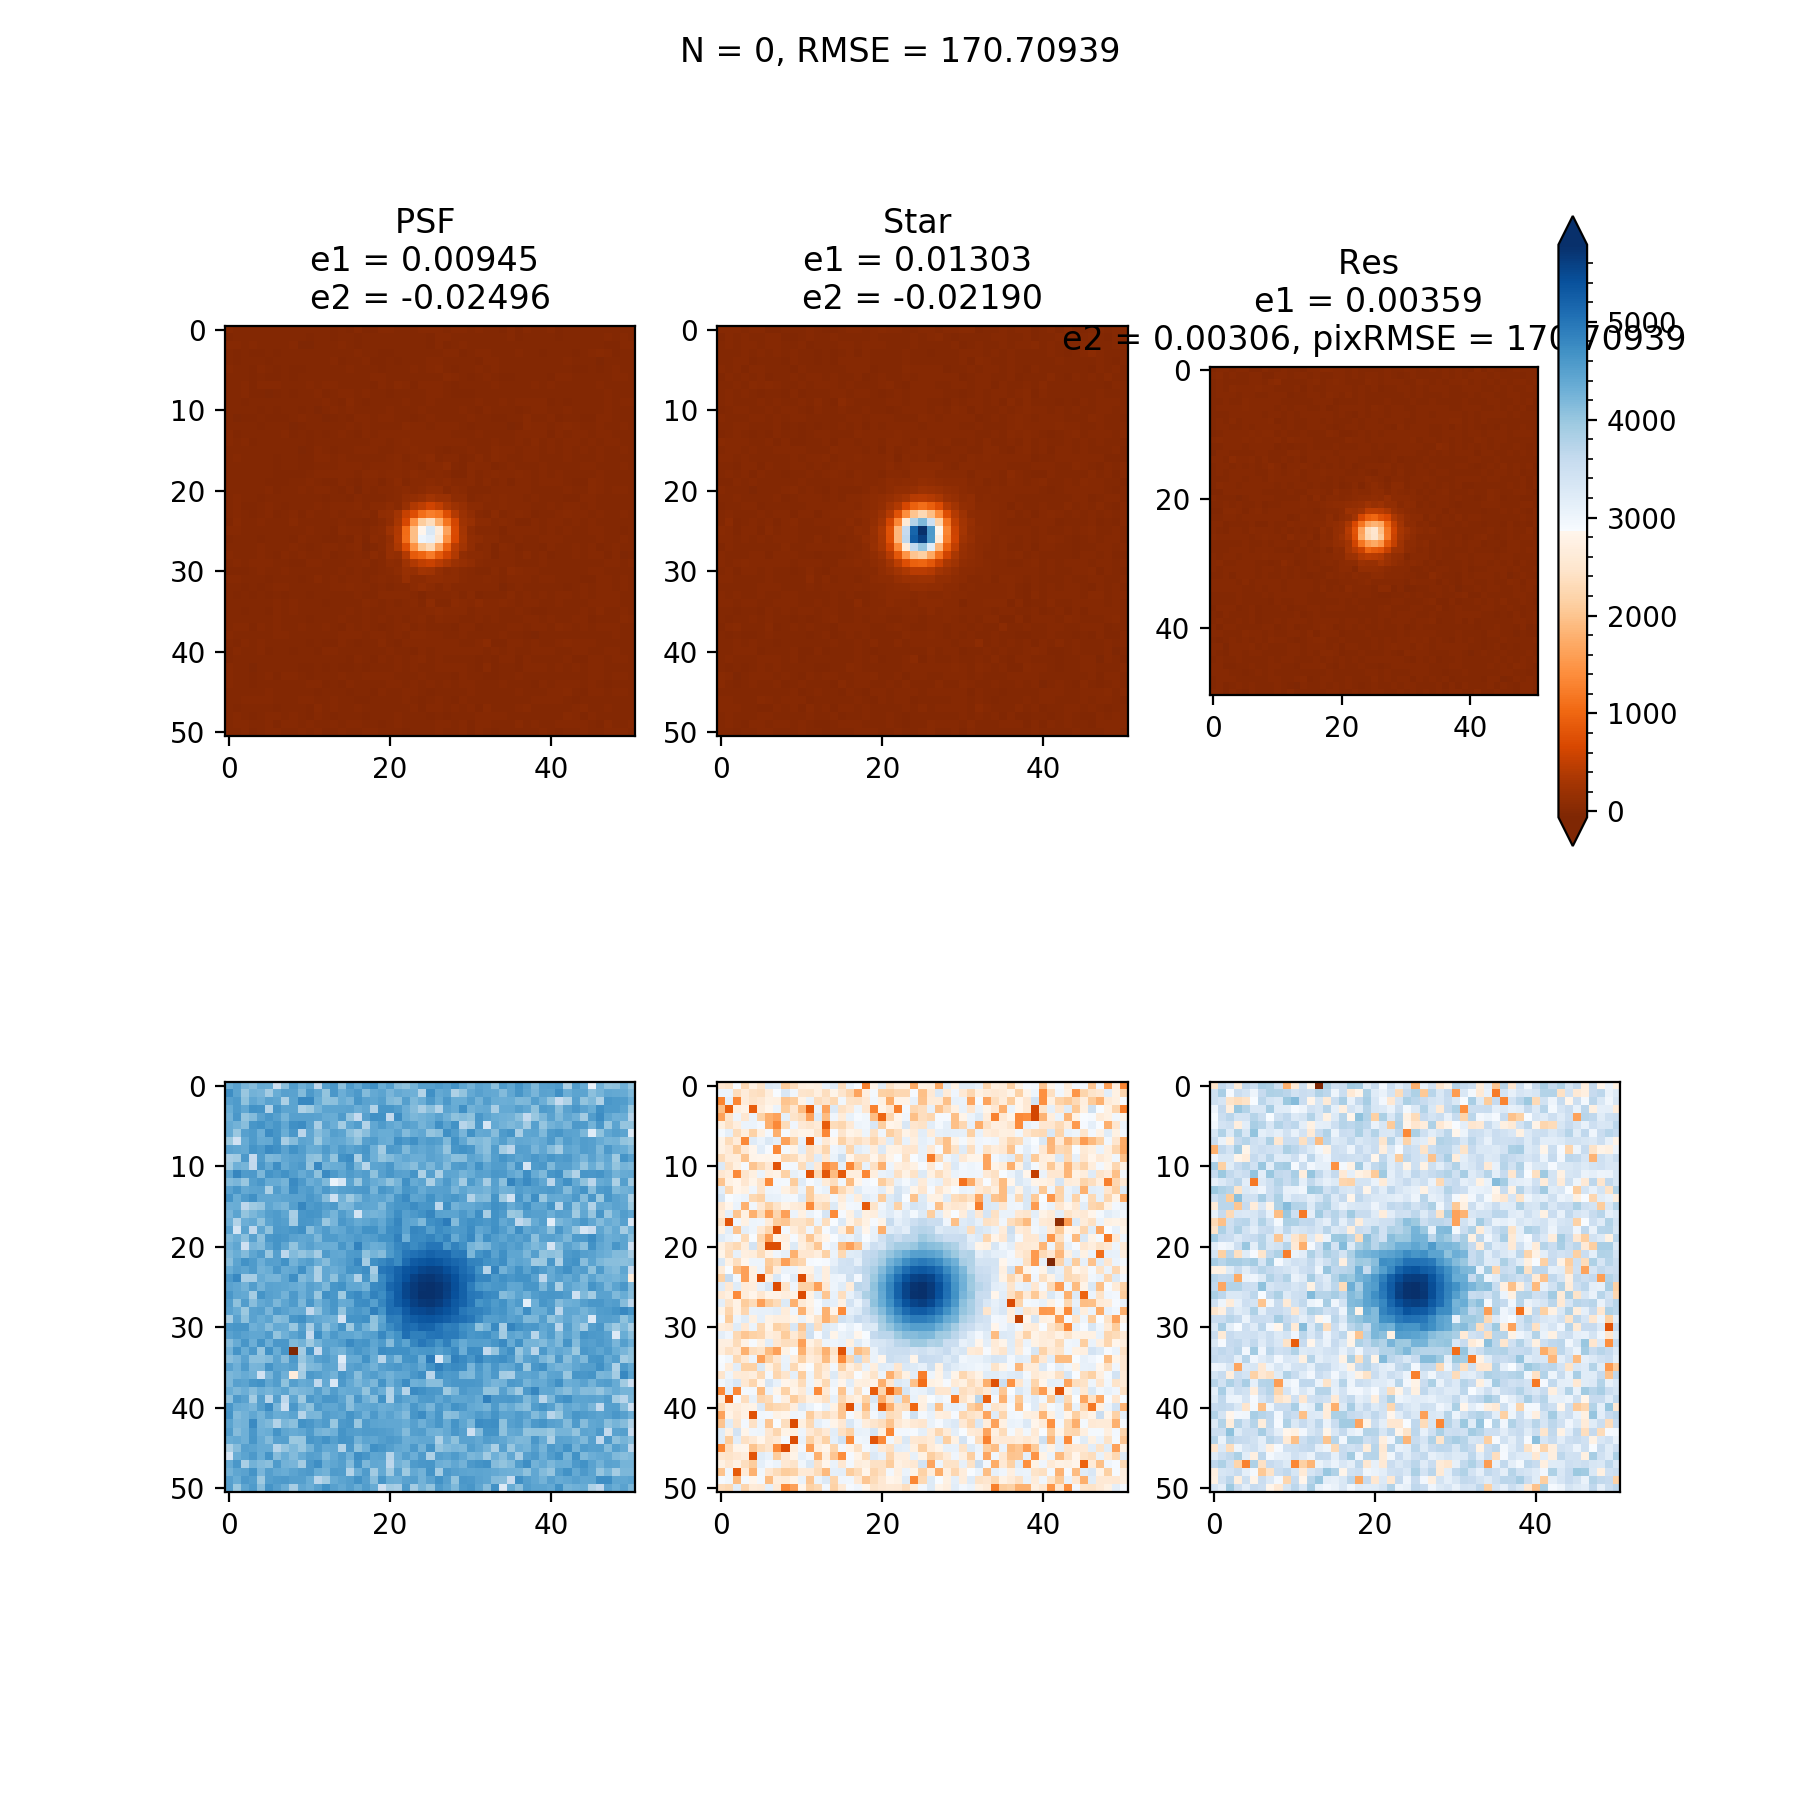

<IPython.core.display.Javascript object>


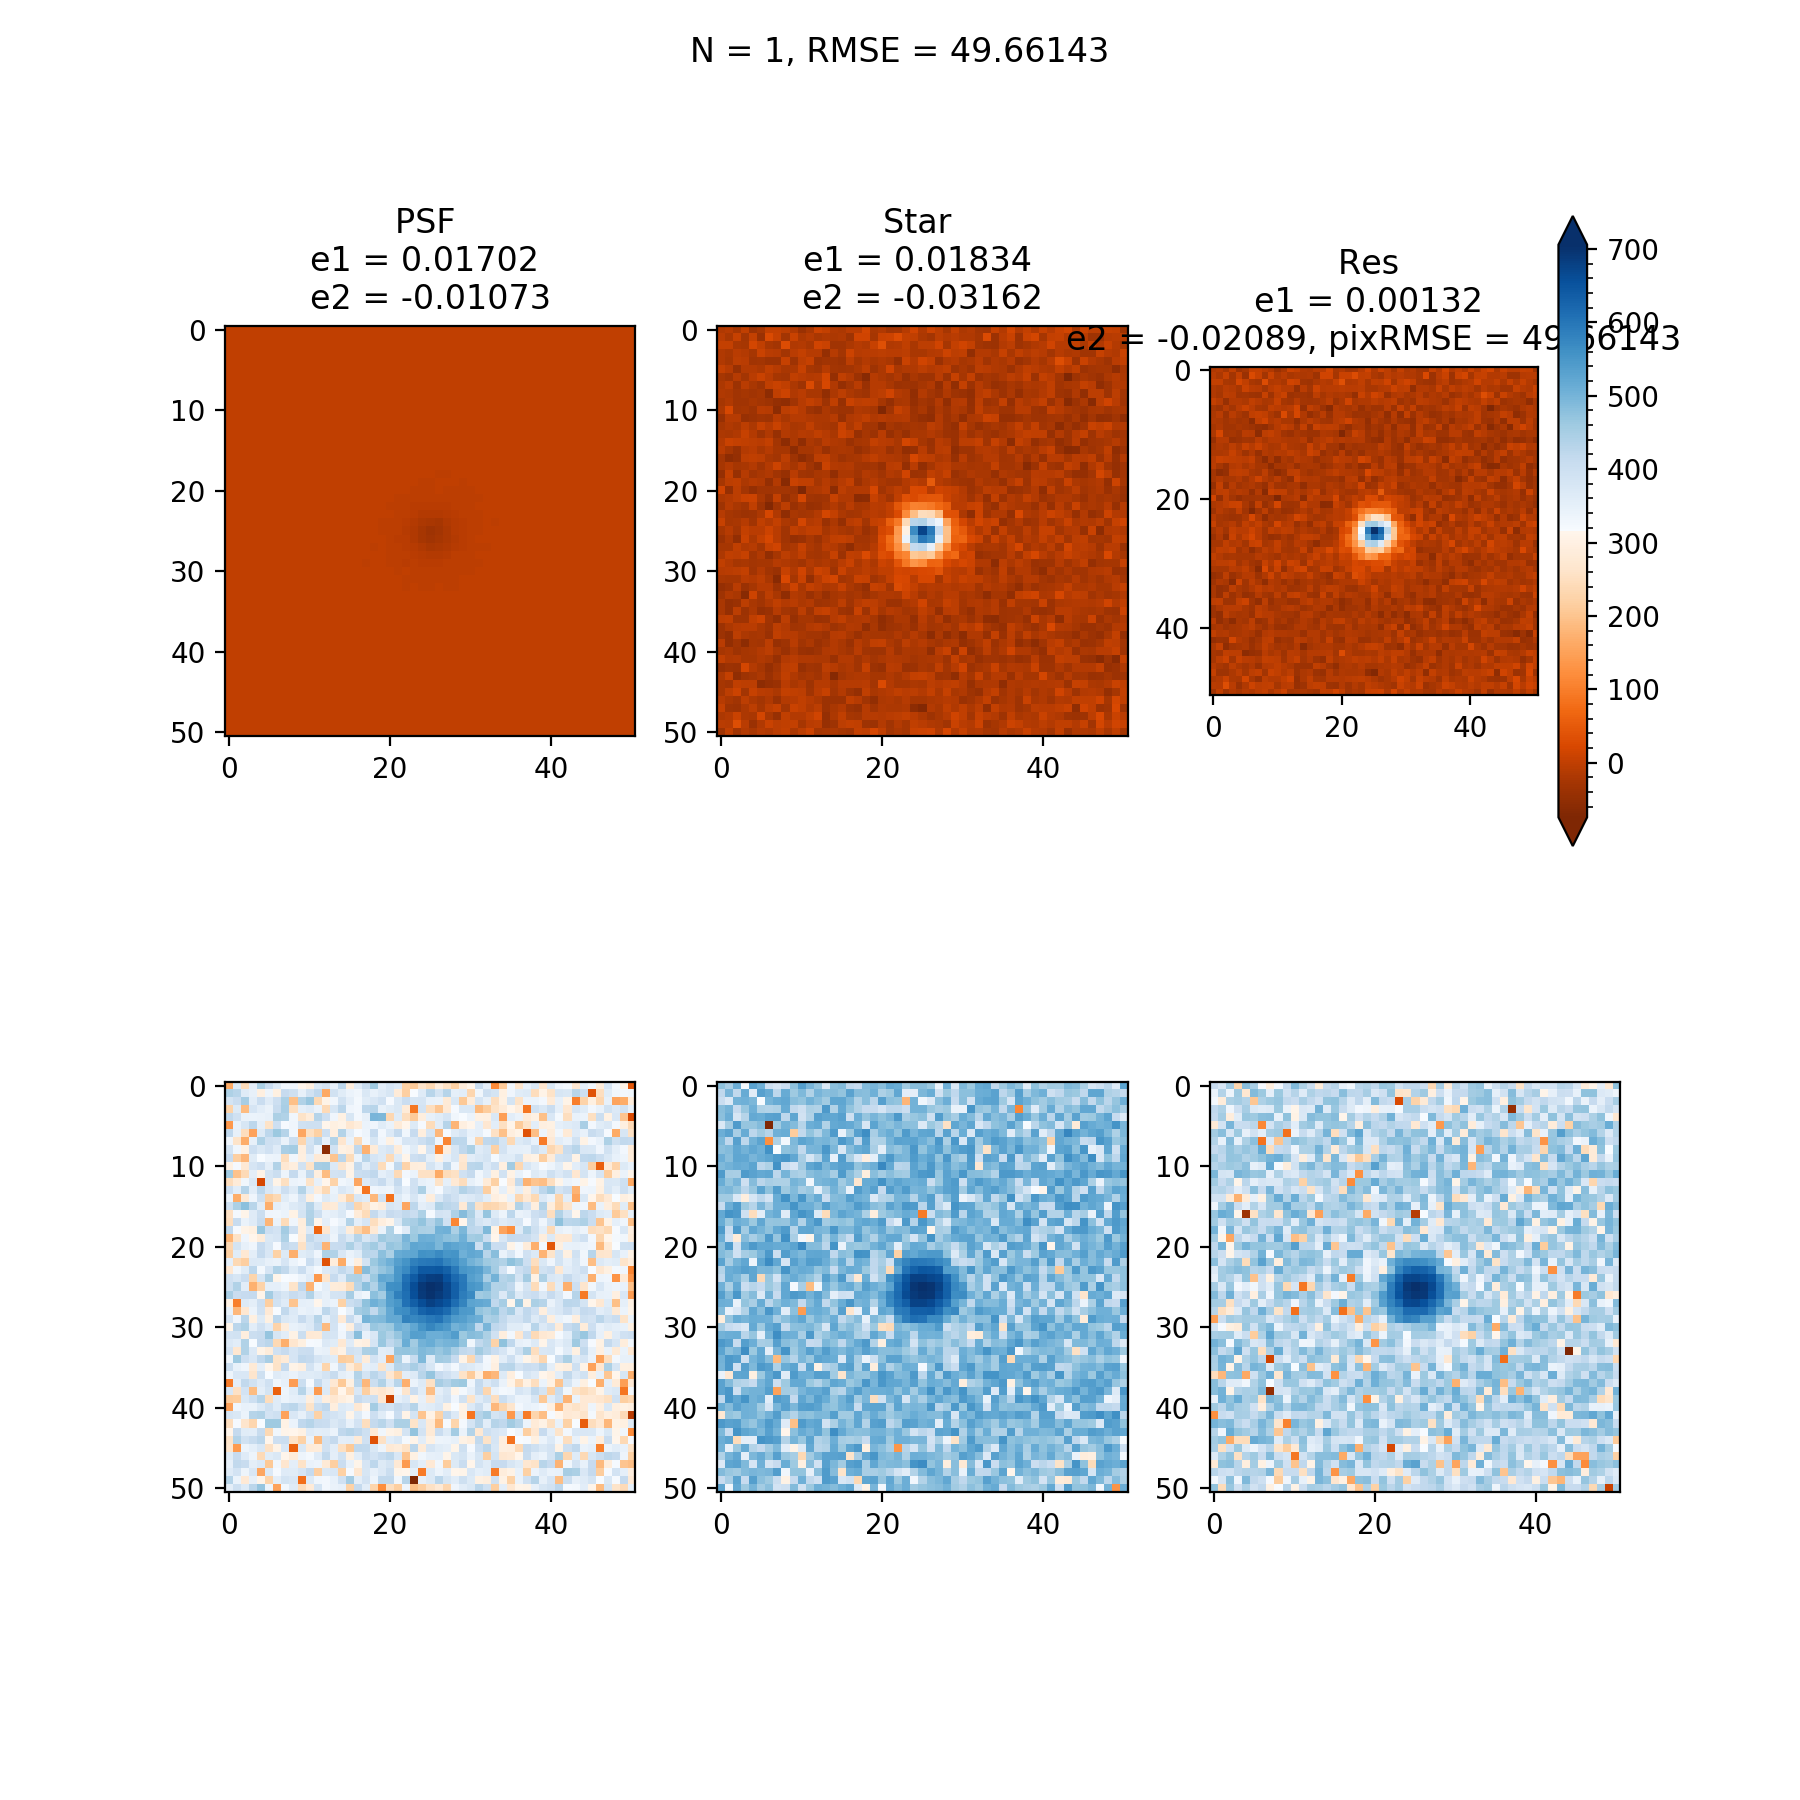

In [15]:
# Define the color map to be used
top = mpl.cm.get_cmap('Oranges_r', 128)
bottom = mpl.cm.get_cmap('Blues', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

n_max = 2

max_im = PSF.shape[0] if PSF.shape[0] < n_max else n_max

for i in range(max_im):
    err = star[i,:,:] - PSF[i,:,:]
    RMSE = np.sqrt(np.sum(err**2)/(star.shape[1]*star.shape[2]))
    fig, axs = plt.subplots(2, 3, figsize=(9,9))
    fig.suptitle('N = %d, RMSE = %.5f\n'%(i,RMSE))
    
    v_max_1 = np.max([np.max(PSF[i,:,:]), np.max(star[i,:,:]), np.max(err)])
    v_min_1 = -1.*np.max([abs(np.min(PSF[i,:,:])) , abs(np.min(star[i,:,:])) , abs(np.min(err))])
    
    im_0 = axs[0,0].imshow(PSF[i,:,:], cmap=newcmp, vmin=v_min_1, vmax=v_max_1)
    axs[0,0].set_title('PSF \ne1 = %.5f \ne2 = %.5f' %(PSF_shapes[i,0],PSF_shapes[i,1]))
    #cbar = fig.colorbar(im_0, ax=axs[0,0], extend='both')
    #cbar.minorticks_on()
    im_1 = axs[0,1].imshow(star[i,:,:], cmap=newcmp, vmin=v_min_1, vmax=v_max_1)
    axs[0,1].set_title('Star \ne1 = %.5f \ne2 = %.5f' %(star_shapes[i,0],star_shapes[i,1]))
    #cbar = fig.colorbar(im_1, ax=axs[0,1], extend='both')
    #cbar.minorticks_on()
    im_2 = axs[0,2].imshow(err, cmap=newcmp, vmin=v_min_1, vmax=v_max_1)
    axs[0,2].set_title('Res \ne1 = %.5f \ne2 = %.5f,\npixRMSE = %.5f' %(star_shapes[i,0]-PSF_shapes[i,0],star_shapes[i,1]-PSF_shapes[i,1],RMSE))
    cbar = fig.colorbar(im_2, ax=axs[0,2], extend='both')
    cbar.minorticks_on()
    
    #v_max_log = np.max([np.max(np.log10(abs(PSF[i,:,:]))), np.max(np.log10(abs(star[i,:,:]))), np.max(np.log10(abs(err)))])
    #v_min_log = -1.*np.max([abs(np.min(np.log10(abs(PSF[i,:,:])))) , abs(np.min(np.log10(abs(star[i,:,:])))) , abs(np.min(np.log10(abs(err))))])
    
    axs[1,0].imshow(np.log10(abs(PSF[i,:,:])), cmap=newcmp)#, vmin=v_min_log, vmax=v_max_log)
    axs[1,1].imshow(np.log10(abs(star[i,:,:])), cmap=newcmp)#, vmin=v_min_log, vmax=v_max_log)
    axs[1,2].imshow(np.log10(abs(err)), cmap=newcmp)#, vmin=v_min_log, vmax=v_max_log)
    #plt.colorbar(im, ax = axs[0,0])

#cbar = plt.colorbar(im, ax=plt.gca(), extend='both')
#cbar.minorticks_on()
    

In [21]:
# Define the color map to be used
top = mpl.cm.get_cmap('Oranges_r', 128)
bottom = mpl.cm.get_cmap('Blues', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

n_max = 50

max_im = PSF.shape[0] if PSF.shape[0] < n_max else n_max

fig, axs = plt.subplots(n_max, 3, figsize=(9,5*n_max))
#fig.suptitle('N = %d, RMSE = %.5f\n'%(i,RMSE))

for i in range(max_im):
    err = star[i,:,:] - PSF[i,:,:]
    RMSE = np.sqrt(np.sum(err**2)/(star.shape[1]*star.shape[2]))

    
    v_max_1 = np.max([np.max(PSF[i,:,:]), np.max(star[i,:,:]), np.max(err)])
    v_min_1 = -1.*np.max([abs(np.min(PSF[i,:,:])) , abs(np.min(star[i,:,:])) , abs(np.min(err))])
    
    im_0 = axs[i,0].imshow(PSF[i,:,:], cmap=newcmp, vmin=v_min_1, vmax=v_max_1)
    axs[i,0].set_title('PSF N=%d \ne1 = %.5f \ne2 = %.5f' %(i,PSF_shapes[i,0],PSF_shapes[i,1]))
    #cbar = fig.colorbar(im_0, ax=axs[0,0], extend='both')
    #cbar.minorticks_on()
    im_1 = axs[i,1].imshow(star[i,:,:], cmap=newcmp, vmin=v_min_1, vmax=v_max_1)
    axs[i,1].set_title('Star N=%d \ne1 = %.5f \ne2 = %.5f' %(i,star_shapes[i,0],star_shapes[i,1]))
    #cbar = fig.colorbar(im_1, ax=axs[0,1], extend='both')
    #cbar.minorticks_on()
    im_2 = axs[i,2].imshow(err, cmap=newcmp, vmin=v_min_1, vmax=v_max_1)
    axs[i,2].set_title('Res N=%d \ne1 = %.5f \ne2 = %.5f,\npixRMSE = %.3f' %(i,star_shapes[i,0]-PSF_shapes[i,0],star_shapes[i,1]-PSF_shapes[i,1],RMSE))
    cbar = fig.colorbar(im_2, ax=axs[i,2], extend='both')
    cbar.minorticks_on()

    
#plt.title('Model PSF and stars -2079613-10', fontsize=20)
plt.savefig('test-RCA_hybrid_NOPSFEx_ModelPSF_stars-2079613-10.png')
plt.show()


<IPython.core.display.Javascript object>